## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [77]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
import seaborn

import json
import os
#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


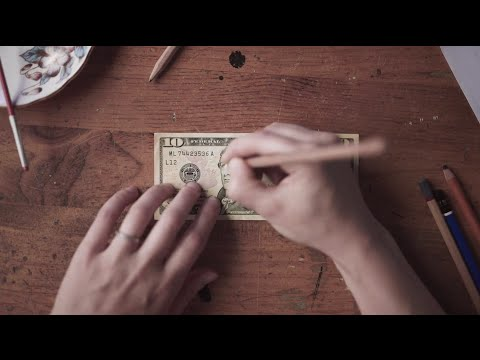

In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [4]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

#define dictionaries
allmales={'all': None, 'white': None, 'black': None, 'asian': None, 'hispanic': None}
allfemales={'all': None, 'white': None, 'black': None, 'asian': None, 'hispanic': None}
for i in [2,3]:
    j=0
    for k in [1, 4, 6, 8, 9]:
        if i==2:
            allmales[allmales.keys()[j]] = pd.read_excel(url + 'pinc08_' + str(i) + '_1_' + str(k) + '.xls', skiprows = 9)
        elif i==3:
            allfemales[allfemales.keys()[j]] = pd.read_excel(url + 'pinc08_' + str(i) + '_1_' + str(k) + '.xls', skiprows = 9)
        j += 1

In [5]:
type(allfemales)

dict

In [6]:
allfemales['all'].head()

Characteristic  Total with Income  $1 to $2,499 or loss  \
0                        NaN                NaN                   NaN   
1                  ....Total            74382.0                5138.0   
2                   Earnings            49073.0                2830.0   
3         ..Wages and Salary            46694.0                2552.0   
4  ..Nonfarm Self-Employment             3386.0                 978.0   

   $2,500 to $4,999  $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
0               NaN               NaN               NaN                 NaN   
1            2524.0            3328.0            4861.0              5221.0   
2            2002.0            2004.0            1648.0              2850.0   
3            1867.0            1825.0            1490.0              2665.0   
4             221.0             298.0             162.0               257.0   

   $12,500 to $14,999  $15,000 to $17,499  $17,500 to $19,999  \
0                 NaN                 NaN                 NaN   
1              3831.0              4495.0              2875.0   
2              1141.0              2404.0              1490.0   
3              1116.0              2251.0              1440.0   
4                54.0               171.0                83.0   

        ...         $92,500 to $94,999  $95,000 to $97,499  \
0       ...                        NaN                 NaN   
1       ...                      146.0               220.0   
2       ...                       44.0               174.0   
3       ...                       47.0               167.0   
4       ...                        0.0                 0.0   

   $97,500 to $99,999  $100,000 and over  Median income  \
0                 NaN                NaN  Value\n(Dol.)   
1               145.0             3426.0          23780   
2                97.0             2677.0          30626   
3                96.0             2539.0          30919   
4                 0.0              107.0          10328   

              Unnamed: 44    Mean income             Unnamed: 46  Gini ratio  \
0  Standard\nerror (Dol.)  Value\n(Dol.)  Standard\nerror (Dol.)       Ratio   
1                     298          34014                     327       0.494   
2                     205          38518                     413       0.467   
3                     203          38758                     418        0.46   
4                     602          22080                    1453       0.673   

       Unnamed: 48  
0  Standard\nerror  
1           0.0033  
2           0.0044  
3           0.0044  
4           0.0201  

[5 rows x 49 columns]

In [7]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

# Descriptive phase: 


In [8]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN      

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

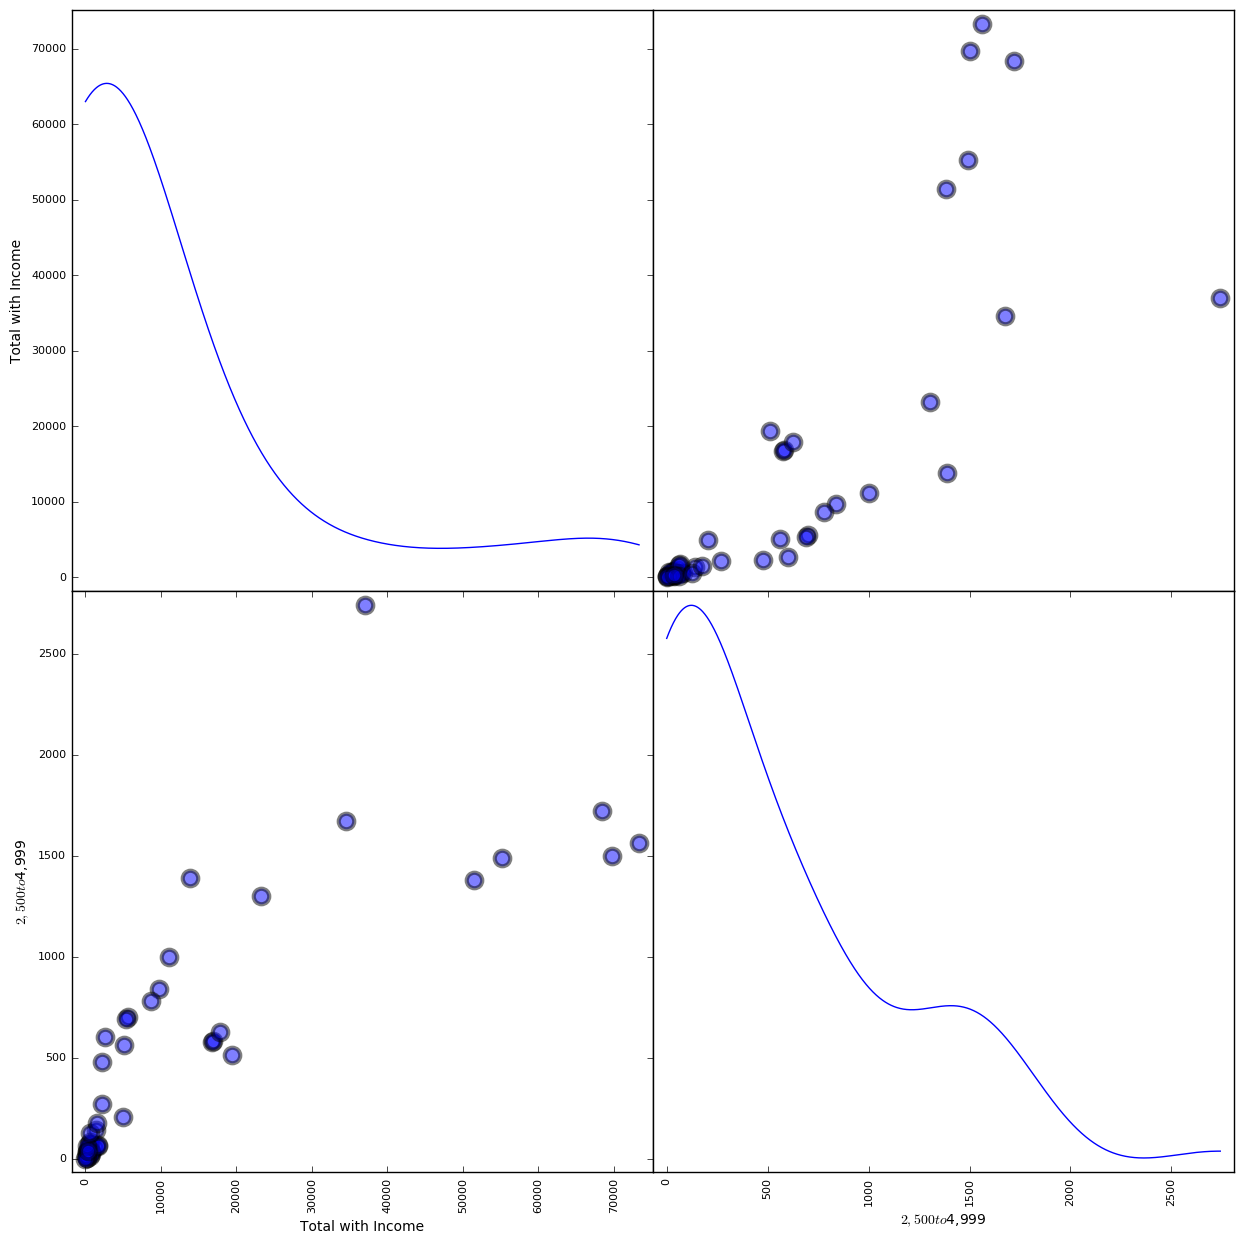

In [9]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

The graph above shows Total Number of People earning income versus the total number of people earning $2500 to 4999, 
with each point representing a different type of income.

In [43]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [51]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is stored how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

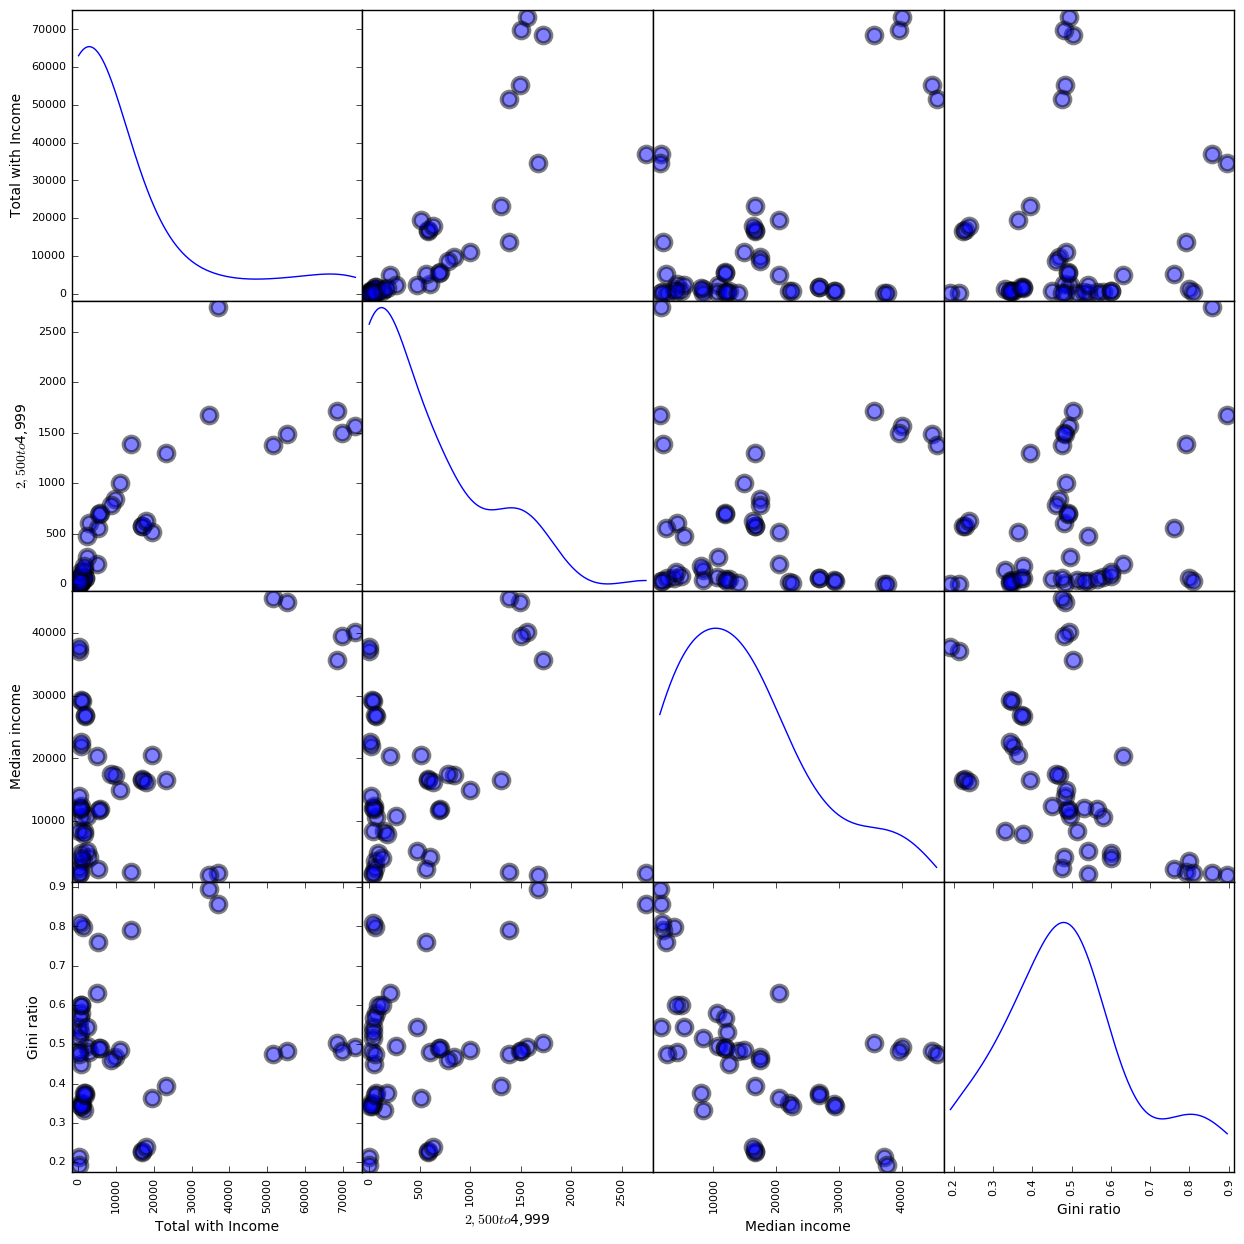

In [52]:
# use scatter_matrix to make this plot... 
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

The picture above shows the plots of total number of men earning income, total number of men earning $2500 to 4999, total median income (for men), and the Gini ratio for men, with each dot representing a different type of income.

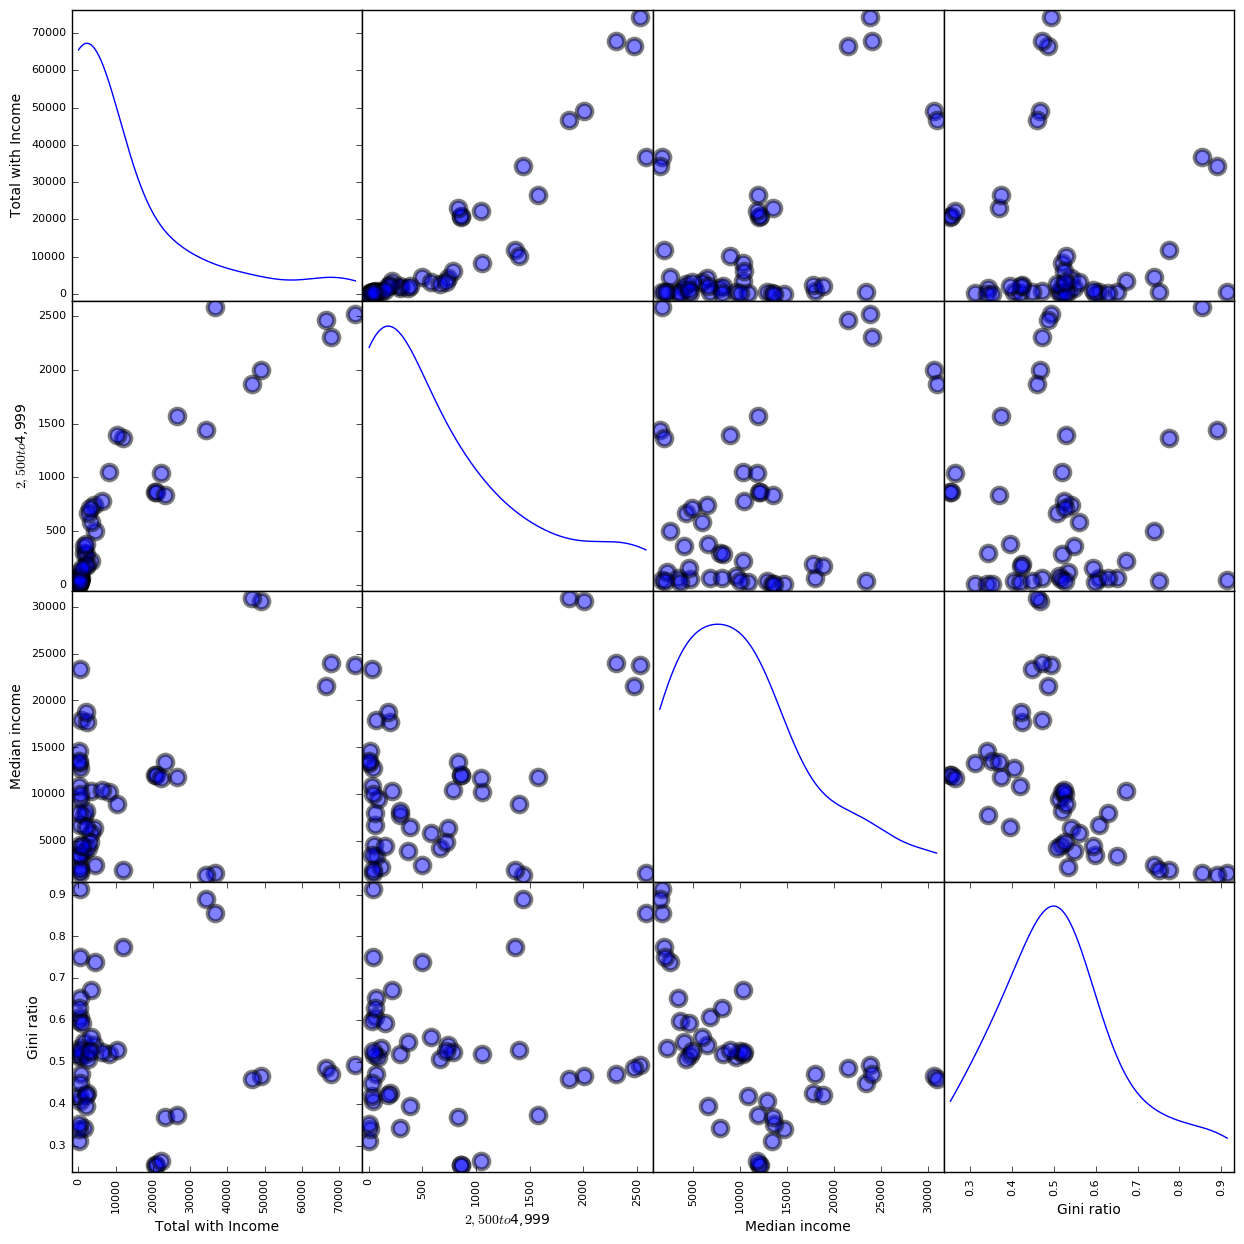

In [53]:
# do the same for all female
# use scatter_matrix to make this plot... 
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

The picture above shows the plots of total number of women earning any income versus the total number of women earning $2500 to 4999 income, with each dot representing a different type of income.

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

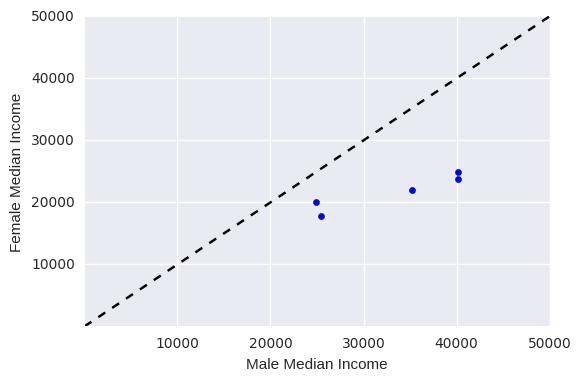

In [78]:
##plotting the Total median incame by race
pl.plot([0,50000], [0, 50000],'k--')

pl.scatter(x = [allmales[i]['Median income'][1] for i in allmales.keys()],
                y= [allfemales[i]['Median income'][1] for i in allfemales.keys()])

pl.xlim(10, 50000)
pl.ylim(10, 50000)

plt.xlabel('Male Median Income')
plt.ylabel('Female Median Income')


The graph above shows the plot of Male Median Income vs Female Median Income, with each point representing a different race.

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

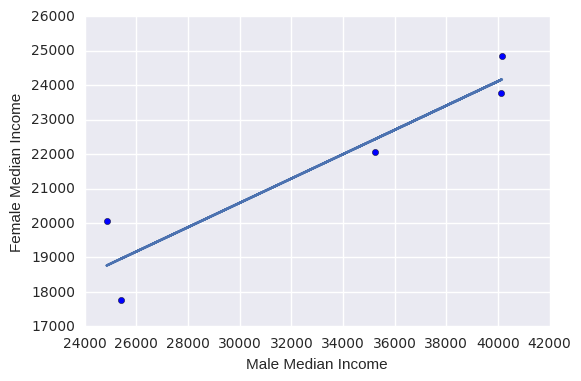

In [79]:
#fit with whichever method you prefer and plot here
x = [allmales[i]['Median income'][1] for i in allmales.keys()]
y = [allfemales[i]['Median income'][1] for i in allfemales.keys()]
newx = x
     
pl.scatter(x, y)

pl.plot(newx, np.poly1d(np.polyfit(x, y, 1))(newx))

plt.xlabel('Male Median Income')
plt.ylabel('Female Median Income')

The graph above shows male median income versus female median income, with a line of best fit drawn through the points.

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [27]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

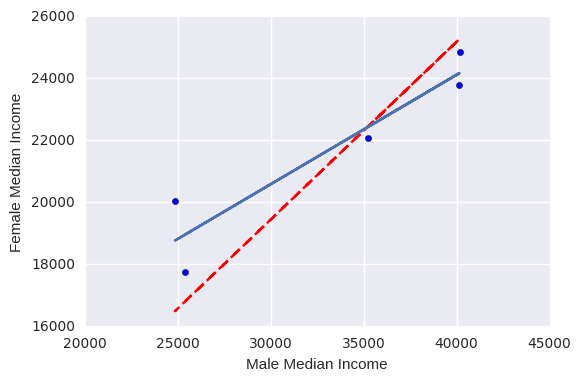

In [80]:
#...

female_income_analytical_predict = [beta0 + (beta1 * x[i]) for i in range(len(x))]

pl.plot(x, female_income_analytical_predict, 'r--')
pl.scatter(x, y)

pl.plot(newx, np.poly1d(np.polyfit(x, y, 1))(newx))

plt.xlabel('Male Median Income')
plt.ylabel('Female Median Income')

The graph above shows male median income plotted vs. female median income, with two lines of best fit drawn. The red line of best fit is drawn with an additional data point at (0, 0) incorporated into the model, whereas the blue line of best fit does not.

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [56]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values


['hispanic', 'all', 'black', 'white', 'asian']
['hispanic', 'all', 'black', 'white', 'asian']
red, yellow, green, pink, tan


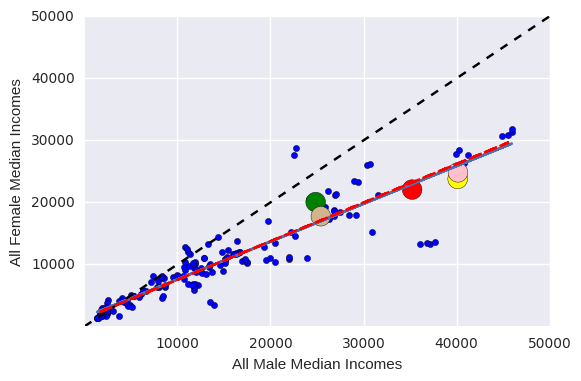

In [83]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

#fit with whichever method you prefer and plot here
x_all = all_males_allincomes[mask]
y_all = all_females_allincomes[mask]

pl.scatter(x_all, y_all)

pl.plot(x_all, np.poly1d(np.polyfit(x_all, y_all, 1))(x_all))

pl.plot([0,50000], [0, 50000],'k--')

#plot median income race points
x_race = [allmales[i]['Median income'][1] for i in allmales.keys()]
y_race = [allfemales[i]['Median income'][1] for i in allfemales.keys()]

pl.scatter([allmales[i]['Median income'][1] for i in allmales.keys()],  
            [allfemales[i]['Median income'][1] for i in allfemales.keys()], 
             s = 200, c = ['red', 'yellow', 'green', 'pink', 'tan'])

plt.xlabel('All Male Median Incomes')
plt.ylabel('All Female Median Incomes')

pl.xlim(10, 50000)
pl.ylim(10, 50000)

cor_all = stats.spearmanr(x_all, y_all)
beta1_all = cor_all[0] * y_all.std() / x_all.std()
beta0_all = y_all.mean() - beta1_all * x_all.mean()
beta0_all, beta1_all

female_income_all_predict = [beta0_all + (beta1_all * x_all[i]) for i in range(len(x_all))]

pl.plot(x_all, female_income_all_predict, 'r--')
print (allmales.keys())
print (allfemales.keys())
print ('red,', 'yellow,', 'green,', 'pink,', 'tan')

### CAPTION: The plot above shows for all types of income, the plot of median male income vs median female income, for all types of incomes.

In [82]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [70]:
stipend_geoff = 100000

stipend_female_geoff = beta0_all + (beta1_all * stipend_geoff)
print(stipend_female_geoff)

63528.2479527


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

Black and hispanic women make proportionally more compared to black men and hispanic men, respectively, when compared to the rest of the data. White and asian men make proportinally more compared to white and asian women, respectively, when compared to the rest of the data. There's also a large spread in incomes between black and hispanics and asians and whites. I would analyze both the extent of the difference between incomes between the races, and also if those differences are significant, across all different types of income. It would be interesting to see which types of income have the highest differences, and also which types of income have the least amount of difference.